In [ ]:
import xml.etree.ElementTree as ET

data = '''
<person>
  <name>Chuck</name>
  <phone type="intl">
     +1 734 303 4456
   </phone>
   <email hide="yes"/>
</person>'''

tree = ET.fromstring(data)
print('Name:', tree.find('name').text)
print('Attr:', tree.find('email').get('hide'))

# Code: http://www.py4e.com/code3/xml1.py


In [7]:
import xml.etree.ElementTree as ET
import urllib.request, urllib.parse, urllib.error
import json
#cannot send two requests to the api at the same time

serviceurl = 'https://search.idigbio.org/v2/search/records'

#API wants: {"genus":"acer"}
genus = input('Enter a genus name: ')

genus_dict = {"genus" : genus}

#family =input('Enter a scientific name: ')

#species_dict = {"scientificname": family}


#if len(genus_dict) < 1: break

#url = serviceurl + "?" + urllib.parse.urlencode(
#    {'rq': json.dumps(species_dict)})

url = serviceurl + "?" + urllib.parse.urlencode(
    {'rq': json.dumps(genus_dict)})
#rq= <--- stack overflow? returns people's emails
print('Retrieving', url)
uh = urllib.request.urlopen(url)
data = uh.read().decode()
print('Retrieved', len(data), 'characters')

try:
    js = json.loads(data)
except:
    js = None

# Comment out because it's kind of long   
# print(json.dumps(js, indent=4))
species_dict={}
for item in js['items']:
    #print(item['data']['dwc:scientificName'])
    try:
        species=item['data']['dwc:scientificName']
        #species=item['data']['dwc:county']
    except:
        continue
    try:
        species_dict[species]+=1
        #species_dict[species]=species_dict[species]+1
        #+= notation for appending to dictionary
        #species_dict[item['data']['dwc:scientificName']]+=1
        #species_dict.append(item)
    except:
        species_dict[species]=1
        #species_dict[item['data']['dwc:scientificName']]=1
        
    #for key,value in item['data'].items():
    #    print(key,value)
    #break
print("These are the species in the genus: ", genus)
speciescount=0
recordcount=0
for key in species_dict:
    speciescount+=1
    recordcount+=species_dict[key]
    print(f'{key}, which has {species_dict[key]} records')
#print(species_dict)
print(f"The total amount of species for the query is: {speciescount}")
print(f"The total amount of records for the query is: {recordcount}")


Enter a genus name:  acer


Retrieving https://search.idigbio.org/v2/search/records?rq=%7B%22genus%22%3A+%22acer%22%7D
Retrieved 1993789 characters
These are the species in the genus:  acer
Acer medianum, which has 10 records
Acer kluckingii, which has 9 records
Acer busamarum, which has 5 records
Acer, which has 14 records
Acer glabroides, which has 7 records
Acer oregonianum, which has 15 records
Acer negundoides, which has 10 records
Acer scottiae, which has 4 records
Acer tyrrelli, which has 12 records
Acer macrophyllum, which has 1 records
Acer septilobatum, which has 2 records
Acer ashwillii, which has 2 records
Acer riogrande, which has 1 records
Acer cranei, which has 1 records
Acer collawashense, which has 1 records
Acer taggartii, which has 3 records
Acer chaneyi, which has 1 records
Acer elkoanum, which has 1 records
Acer schornii, which has 1 records
The total amount of species for the query is: 19
The total amount of records for the query is: 100


Text(0, 0.5, 'Prevalence')

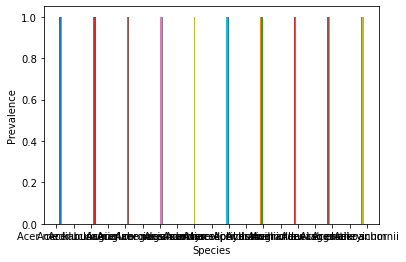

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(species_dict)
plt.xlabel('Species')
plt.ylabel('Prevalence')

# Also dont know how to adjust the scale 

In [5]:
flcounties=['Alachua',
'Baker',
'Bay',
'Bradford',
'Brevard',
'Broward',
'Calhoun',
'Charlotte',
'Citrus',
'Clay',
'Collier',
'Columbia',
'DeSoto',
'Dixie',
'Duval',
'Escambia',
'Flagler',
'Franklin',
'Gadsden',
'Gilchrist',
'Glades',
'Gulf',
'Hamilton',
'Hardee',
'Hendry',
'Hernando',
'Highlands',
'Hillsborough',
'Holmes',
'Indian River',
'Jackson',
'Jefferson',
'Lafayette',
'Lake',
'Lee',
'Leon',
'Levy',
'Liberty',
'Madison',
'Manatee',
'Marion',
'Martin',
'Miami-Dade',
'Monroe',
'Nassau',
'Okaloosa',
'Okeechobee',
'Orange',
'Osceola',
'Palm Beach',
'Pasco',
'Pinellas',
'Polk',
'Putnam',
'St. Johns',
'St. Lucie',
'Santa Rosa',
'Sarasota',
'Seminole',
'Sumter',
'Suwannee',
'Taylor',
'Union',
'Volusia',
'Wakulla',
'Walton',
'Washington',
]

In [ ]:
for item in js['items']:
    #print(item['data']['dwc:scientificName'])
    try:
        species=item['data']['dwc:scientificName']['dwc:county']
    except:
        continue